In [1]:
from datetime import date, timedelta
import requests
from requests_ntlm import HttpNtlmAuth
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline  

Download newest data from ECDC website. This uses the current date from your computer.

In [2]:
today = date.today() - timedelta(days=1)
ecdcUrl = ('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx' %today)
fname = 'ecdc.xlsx'

r = requests.get(ecdcUrl, auth=HttpNtlmAuth(':',':'))

with open(fname, 'wb') as f:
    f.write(r.content)

In [3]:
totalData = pd.read_excel(fname)
#totalData.tail()

Select countries to compare. Command or ctrl select different countries.

In [4]:
countries = totalData['countriesAndTerritories'].unique()
countrySelector = widgets.SelectMultiple(
    options=countries,
    description='',
    rows=15,
)
countrySelector

SelectMultiple(options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Bar…

In [5]:
analyzedCountries = countrySelector.value
print(analyzedCountries)
df = totalData[totalData['countriesAndTerritories'].isin(analyzedCountries)]
dfNewCases = pd.pivot_table(df, index='dateRep', columns = 'countriesAndTerritories', values='cases').reset_index()
dfDeaths = pd.pivot_table(df, index='dateRep', columns = 'countriesAndTerritories', values='deaths').reset_index()

dfNewCases.tail()

('Brazil', 'China', 'Germany', 'Italy', 'United_States_of_America')


countriesAndTerritories,dateRep,Brazil,China,Germany,Italy,United_States_of_America
114,2020-04-23,2678,12,2352,3370,17588
115,2020-04-24,3735,8,2337,2646,26543
116,2020-04-25,3503,15,2055,3021,21352
117,2020-04-26,5514,10,1737,2357,48529
118,2020-04-27,3379,290,1018,2324,26857


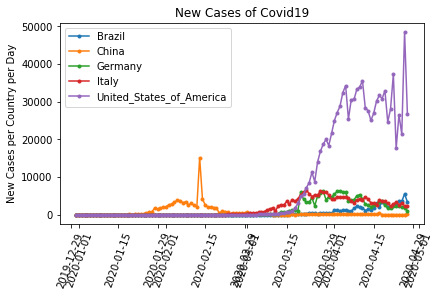

In [6]:
fig, ax = plt.subplots(constrained_layout=True)

for country in analyzedCountries:
    a = ax.plot(dfNewCases.dateRep, dfNewCases[country], '.-')
    
ax.set_ylabel('New Cases per Country per Day')
ax.set_title('New Cases of Covid19')
ax.legend()

plt.xticks(rotation=70)
plt.show()

In [8]:
sum(dfNewCases.United_States_of_America)

965910

In [9]:
biggestLength = 0
oldestCountry = '';
newMergedDf = [];
for country in analyzedCountries:
    colName = 'totalCases' + country
    dfNewCases[colName] = dfNewCases[country].cumsum() #use the cumulative sum to add all new cases up to now and calculate total cases
    dfOver1000 = dfNewCases.loc[dfNewCases[colName] >= 1000]
    if(len(dfOver1000) > biggestLength):
        biggestLength = len(dfOver1000)
        oldestCountry = country
      #  newMergedDf = dfNewCases[dfNewCases[colName]] #totalData[totalData['countriesAndTerritories']
       # newMergedDf[country] = dfNewCases[country]
    
    datePassed1000 = dfOver1000.iloc[0].dateRep
    print(country, 'passed 1000 cases on', datePassed1000)


Brazil passed 1000 cases on 2020-03-22 00:00:00
China passed 1000 cases on 2020-01-25 00:00:00
Germany passed 1000 cases on 2020-03-10 00:00:00
Italy passed 1000 cases on 2020-03-01 00:00:00
United_States_of_America passed 1000 cases on 2020-03-11 00:00:00


In [11]:
dfNewCases.tail()

countriesAndTerritories,dateRep,Brazil,China,Germany,Italy,United_States_of_America,totalCasesBrazil,totalCasesChina,totalCasesGermany,totalCasesItaly,totalCasesUnited_States_of_America
114,2020-04-23,2678,12,2352,3370,17588,45757,83876,148046,187327,842629
115,2020-04-24,3735,8,2337,2646,26543,49492,83884,150383,189973,869172
116,2020-04-25,3503,15,2055,3021,21352,52995,83899,152438,192994,890524
117,2020-04-26,5514,10,1737,2357,48529,58509,83909,154175,195351,939053
118,2020-04-27,3379,290,1018,2324,26857,61888,84199,155193,197675,965910
